In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


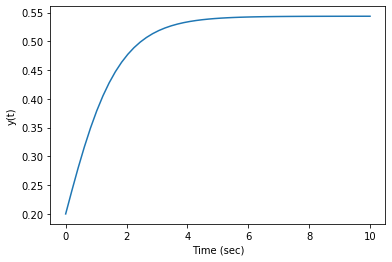

In [2]:
def f(y,t):
    dydt = y*np.exp(-t)
    return dydt
t = np.linspace(0,10) # linspace(start,stop,num =?)
y0 = 0.2
y = odeint(f,y0,t)

plt.figure(figsize = (6,4))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.show()


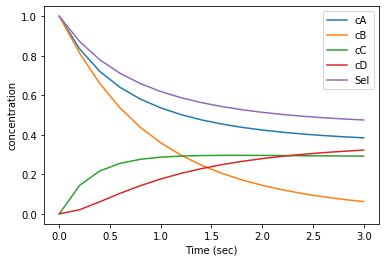

In [3]:
# Reaction  A+B = C and B+C = D

def mult_rxn(c,t):
    cA = c[0]
    cB = c[1]
    cC = c[2]
    cD = c[3]
    k1 = 1.0
    k2 = 1.5
    r1 = k1*cA*cB
    r2 = k2*cB*cC
    dAdt = -r1
    dBdt = -r1-r2
    dCdt = r1-r2
    dDdt = r2
    return [dAdt,dBdt,dCdt,dDdt]

# for the solver
c0 = [1,1,0,0] # initial A and B = 1; C and D = 0
t = np.arange(0,3.01,0.2)
c = odeint(mult_rxn,c0,t)

cA = c[:,0]
cB = c[:,1]
cC = c[:,2]
cD = c[:,3]

# selectivity
S = np.empty(len(cC))
for i in range(len(cC)):
    if abs(cC[i]+cD[i] > 1e-10):
        S[i] = cC[i]/(cC[i]+cD[i])
    else:
        S[i] = 1.0
        
plt.figure(figsize = (6,4))
plt.plot(t,cA,label = 'cA')
plt.plot(t,cB,label ='cB')
plt.plot(t,cC,label = 'cC')
plt.plot(t,cD,label ='cD')
plt.plot(t,S,label ='Sel')
plt.xlabel('Time (sec)')
plt.ylabel('concentration')
plt.legend()
plt.savefig('mult_rxns.png')
plt.show()

In [4]:
# solving the Heat Equation
# given details

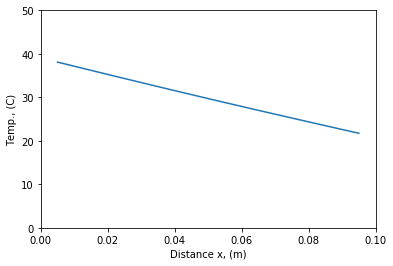

In [5]:
l = 0.1 # wall thickness
n = 10 # num of slices
T0 = 0 # initial wall temps
T1s = 40 # wall surface temp. at the beginning
T2s = 20 # wall surface temp. at the end
dx = l/n
alpha = 0.0001 # thermal diffisivity
t_final = 60
dt = 0.1

# points to plot or visualize
x = np.linspace(dx/2,l-dx/2,n)
# Temp. measurements along x of the wall 
T = np.ones(n)*T0 # 
# derivative vector, to be over written
dTdt = np.empty(n)
# time vector
t = np.arange(0,t_final,dt)

#through time, t and space, x
#plt.clf() didn't work
for j in range(1,len(t)):    
    for i in range(1,n-1):
        dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2+(T[i+1]-T[i])/dx**2)
    dTdt[0] = alpha*(-(T[0]-T1s)/dx**2+(T[1]-T[0])/dx**2)
    dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2+(T2s-T[n-1])/dx**2)
    T = T + dTdt*dt
plt.figure()
plt.plot(x,T)
plt.axis([0, l,0, 50])
plt.xlabel('Distance x, (m)')
plt.ylabel('Temp., (C)')
plt.show()
plt.pause(0.01)

In [6]:
# Solve the heat equation using the odeint solver

In [7]:
def heat_eqn(T,t):
    l = 0.1
    n = 10
    T0 = 0
    T1s = 40
    T2s = 20
    dx = l/n
    dt = 0.1
    alpha = 0.0001
    t_final = 60
    t = np.arange(0,t_final,dt)
    T = np.ones(n)*T0
    dTdt = np.empty(n)
    
    for j in range(1,len(t)):
        for i in range(1,n-1):
            dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2+(T[i+1]-T[i])/dx**2)
    dTdt[0] = alpha*(-(T[0]-T1s)/dx**2+(T[1]-T[0])/dx**2)
    dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2+(T2s-T[n-1])/dx**2)
    return dTdt

# solve for temp. using the solver, odeint
l = 0.1
n = 10
T0 = 0
dx = l/n
T_0 = np.ones(n)*T0 # 
t_final = 60
x = np.linspace(dx/2,l-dx/2,n)

dt = 0.1
x = np.linspace(dx/2,l-dx/2,n)
t = np.arange(0,t_final,dt)
T = np.ones(n)*T0
T = T + heat_eqn*dt
T = odeint(heat_eqn,T_0,t) # did not work?!

plt.figure(figsize = (6,4))
plt.plot(x,T)
plt.axis([0, l,0, 50])
plt.xlabel('Distance (m)')
plt.ylabel('Temp.(C)')
plt.show()

TypeError: unsupported operand type(s) for *: 'function' and 'float'